In [1]:
## Import required modules

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import contextily as ctx

In [2]:
## 00 Pre-data-preparation ##
## 04 predios came from predio.gdb (exported as csv)
lu_predio = pd.read_csv('../../data/04_Predios/04_Predios.csv')

##constructions = pd.read_csv('constructions.csv')

lu_predio['PRECBARRIO'] = lu_predio['PRECBARRIO'].astype(str)
lu_predio['PRECMANZAN'] = lu_predio['PRECMANZAN'].astype(str)
lu_predio['PRECPREDIO'] = lu_predio['PRECPREDIO'].astype(str)
lu_predio['PRECCONSTR'] = lu_predio['PRECCONSTR'].astype(str)


In [3]:
## Fix code length and concatenate to group by block (Manzana)

lu_predio['COD_BARRIO_FIX'] = lu_predio['PRECBARRIO'].str.len()
lu_predio.loc[(lu_predio['COD_BARRIO_FIX'] == 4),'PRECBARRIO']=(["00"]+lu_predio['PRECBARRIO'])

lu_predio['COD_MZN_FIX'] = lu_predio['PRECMANZAN'].str.len()
lu_predio.loc[(lu_predio['COD_MZN_FIX'] == 1),'PRECMANZAN']=(["0"]+lu_predio['PRECMANZAN'])

lu_predio['COD_PRE_FIX'] = lu_predio['PRECPREDIO'].str.len()
lu_predio.loc[(lu_predio['COD_PRE_FIX'] == 1),'PRECPREDIO']=(["0"]+lu_predio['PRECPREDIO'])

lu_predio['COD_CON_FIX'] = lu_predio['PRECCONSTR'].str.len()
lu_predio.loc[(lu_predio['COD_CON_FIX'] == 1),'PRECCONSTR']=(["00"]+lu_predio['PRECCONSTR'])
lu_predio.loc[(lu_predio['COD_CON_FIX'] == 2),'PRECCONSTR']=(["0"]+lu_predio['PRECCONSTR'])

lu_predio['PRECODCON'] = (lu_predio['PRECBARRIO']+lu_predio['PRECMANZAN']+lu_predio['PRECPREDIO']+lu_predio['PRECCONSTR'])
lu_predio['PRECODMZN'] = (lu_predio['PRECBARRIO']+"0"+lu_predio['PRECMANZAN'])

lu_predio

## 

,OBJECTID,PRECBARRIO,PRENBARRIO,PRECMANZAN,PRECPREDIO,PRECCONSTR,PRECRESTO,PRETPROPIE,PREDESTINO,PREFINCORP,...,PRETDSI,PREDSI,PREZHFISIC,BARMANPRE,COD_BARRIO_FIX,COD_MZN_FIX,COD_PRE_FIX,COD_CON_FIX,PRECODCON,PRECODMZN
0,1,001101,LAS BRISAS,06,58,007,12006,6,1,2018-07-26T00:00:00.000,...,NaN,NaN,6.712425e+12,1101006058,4,1,2,1,0011010658007,001101006
1,2,001101,LAS BRISAS,06,58,007,12007,6,1,2018-07-26T00:00:00.000,...,NaN,NaN,6.712425e+12,1101006058,4,1,2,1,0011010658007,001101006
2,3,001101,LAS BRISAS,06,58,007,12008,6,1,2018-07-26T00:00:00.000,...,NaN,NaN,6.712425e+12,1101006058,4,1,2,1,0011010658007,001101006
3,4,001101,LAS BRISAS,06,58,007,12009,6,1,2018-07-26T00:00:00.000,...,NaN,NaN,6.712425e+12,1101006058,4,1,2,1,0011010658007,001101006
4,5,001101,LAS BRISAS,06,58,007,12010,6,1,2018-07-26T00:00:00.000,...,NaN,NaN,6.712425e+12,1101006058,4,1,2,1,0011010658007,001101006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2835234,2835235,209106,LA UNION URBANO,05,24,000,0,6,1,2016-02-10T00:00:00.000,...,NaN,NaN,2.901142e+12,209106005024,6,1,2,1,2091060524000,209106005
2835235,2835236,209106,LA UNION URBANO,06,01,000,0,6,1,2000-12-31T00:00:00.000,...,NaN,NaN,2.901142e+12,209106006001,6,1,1,1,2091060601000,209106006
2835236,2835237,209106,LA UNION URBANO,06,02,000,0,6,1,2012-05-24T00:00:00.000,...,S,KR 3 3 86 LAUNION,2.901142e+12,209106006002,6,1,1,1,2091060602000,209106006
2835237,2835238,209106,LA UNION URBANO,06,03,000,0,6,89,2000-12-31T00:00:00.000,...,NaN,NaN,2.901142e+12,209106006003,6,1,1,1,2091060603000,209106006


In [4]:
## Group land use in less categories

lu_predio.loc[lu_predio['PREDESTINO'] == 1, 'gen_lu'] = "residential";
lu_predio.loc[lu_predio['PREDESTINO'] == 3, 'gen_lu'] = "industrial";
lu_predio.loc[lu_predio['PREDESTINO'] == 4, 'gen_lu'] = "facilities";
lu_predio.loc[lu_predio['PREDESTINO'] == 5, 'gen_lu'] = "recreation";
lu_predio.loc[lu_predio['PREDESTINO'] == 6, 'gen_lu'] = "facilities";
lu_predio.loc[lu_predio['PREDESTINO'] == 7, 'gen_lu'] = "mining";
lu_predio.loc[lu_predio['PREDESTINO'] == 8, 'gen_lu'] = "recreation";
lu_predio.loc[lu_predio['PREDESTINO'] == 21, 'gen_lu'] = "commercial";
lu_predio.loc[lu_predio['PREDESTINO'] == 22, 'gen_lu'] = "commercial";
lu_predio.loc[lu_predio['PREDESTINO'] == 23, 'gen_lu'] = "commercial";
lu_predio.loc[lu_predio['PREDESTINO'] == 24, 'gen_lu'] = "parking";
lu_predio.loc[lu_predio['PREDESTINO'] == 61, 'gen_lu'] = "expansion_soil";
lu_predio.loc[lu_predio['PREDESTINO'] == 62, 'gen_lu'] = "expansion_soil";
lu_predio.loc[lu_predio['PREDESTINO'] == 63, 'gen_lu'] = "protected_soil";
lu_predio.loc[lu_predio['PREDESTINO'] == 64, 'gen_lu'] = "state_land";
lu_predio.loc[lu_predio['PREDESTINO'] == 65, 'gen_lu'] = "roads";
lu_predio.loc[lu_predio['PREDESTINO'] == 66, 'gen_lu'] = "recreation";
lu_predio.loc[lu_predio['PREDESTINO'] == 67, 'gen_lu'] = "other";
lu_predio.loc[lu_predio['PREDESTINO'] == 81, 'gen_lu'] = "agricultural";
lu_predio.loc[lu_predio['PREDESTINO'] == 82, 'gen_lu'] = "other";
lu_predio.loc[lu_predio['PREDESTINO'] == 83, 'gen_lu'] = "agricultural";
lu_predio.loc[lu_predio['PREDESTINO'] == 84, 'gen_lu'] = "agricultural";
lu_predio.loc[lu_predio['PREDESTINO'] == 85, 'gen_lu'] = "agricultural";
lu_predio.loc[lu_predio['PREDESTINO'] == 86, 'gen_lu'] = "agricultural";
lu_predio.loc[lu_predio['PREDESTINO'] == 88, 'gen_lu'] = "other";
lu_predio.loc[lu_predio['PREDESTINO'] == 89, 'gen_lu'] = "other";

lu_predio

,OBJECTID,PRECBARRIO,PRENBARRIO,PRECMANZAN,PRECPREDIO,PRECCONSTR,PRECRESTO,PRETPROPIE,PREDESTINO,PREFINCORP,...,PREDSI,PREZHFISIC,BARMANPRE,COD_BARRIO_FIX,COD_MZN_FIX,COD_PRE_FIX,COD_CON_FIX,PRECODCON,PRECODMZN,gen_lu
0,1,001101,LAS BRISAS,06,58,007,12006,6,1,2018-07-26T00:00:00.000,...,NaN,6.712425e+12,1101006058,4,1,2,1,0011010658007,001101006,residential
1,2,001101,LAS BRISAS,06,58,007,12007,6,1,2018-07-26T00:00:00.000,...,NaN,6.712425e+12,1101006058,4,1,2,1,0011010658007,001101006,residential
2,3,001101,LAS BRISAS,06,58,007,12008,6,1,2018-07-26T00:00:00.000,...,NaN,6.712425e+12,1101006058,4,1,2,1,0011010658007,001101006,residential
3,4,001101,LAS BRISAS,06,58,007,12009,6,1,2018-07-26T00:00:00.000,...,NaN,6.712425e+12,1101006058,4,1,2,1,0011010658007,001101006,residential
4,5,001101,LAS BRISAS,06,58,007,12010,6,1,2018-07-26T00:00:00.000,...,NaN,6.712425e+12,1101006058,4,1,2,1,0011010658007,001101006,residential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2835234,2835235,209106,LA UNION URBANO,05,24,000,0,6,1,2016-02-10T00:00:00.000,...,NaN,2.901142e+12,209106005024,6,1,2,1,2091060524000,209106005,residential
2835235,2835236,209106,LA UNION URBANO,06,01,000,0,6,1,2000-12-31T00:00:00.000,...,NaN,2.901142e+12,209106006001,6,1,1,1,2091060601000,209106006,residential
2835236,2835237,209106,LA UNION URBANO,06,02,000,0,6,1,2012-05-24T00:00:00.000,...,KR 3 3 86 LAUNION,2.901142e+12,209106006002,6,1,1,1,2091060602000,209106006,residential
2835237,2835238,209106,LA UNION URBANO,06,03,000,0,6,89,2000-12-31T00:00:00.000,...,NaN,2.901142e+12,209106006003,6,1,1,1,2091060603000,209106006,other


In [5]:
## Group Land-Uses per Block code
lu_mz = pd.pivot_table(lu_predio, values=['PREACONSTR'], index=['PRECODMZN'], columns=['gen_lu'], aggfunc= np.sum, fill_value=0)
lu_mz

PREACONSTR                                                         \
gen_lu    agricultural commercial expansion_soil facilities industrial mining   
PRECODMZN                                                                       
001101001          0.0    7932.12            0.0        0.0      67.02    0.0   
001101002          0.0    9710.36            0.0       79.8    3558.80    0.0   
001101003          0.0       0.00            0.0        0.0    3616.70    0.0   
001101004          0.0       0.00            0.0        0.0       0.00    0.0   
001101005          0.0       0.00            0.0        0.0       0.00    0.0   
...                ...        ...            ...        ...        ...    ...   
209106003          0.0       0.00            0.0       80.0       0.00    0.0   
209106004          0.0       0.00            0.0      191.3       0.00    0.0   
209106005          0.0       0.00            0.0        0.0       0.00    0.0   
209106006          0.0       0.00            0.0        0.0       0.00    0.0   
209106099          0.0       0.00            0.0        0.0       0.00    0.0   

                                                                                
gen_lu    other parking protected_soil recreation residential roads state_land  
PRECODMZN                                                                       
001101001   0.0     0.0            0.0        0.0        0.00   0.0          0  
001101002   0.0     0.0            0.0        0.0    12294.36   0.0          0  
001101003   0.0     0.0            0.0        0.0     9412.02   0.0          0  
001101004   0.0     0.0            0.0        0.0     3996.00   0.0          0  
001101005   0.0     0.0            0.0        0.0     5549.39   0.0          0  
...         ...     ...            ...        ...         ...   ...        ...  
209106003   0.0     0.0            0.0        0.0        0.00   0.0          0  
209106004   0.0     0.0            0.0        0.0      227.70   0.0          0  
209106005   0.0     0.0            0.0        0.0     2132.60   0.0          0  
209106006   0.0     0.0            0.0        0.0      245.25   0.0          0  
209106099   0.0     0.0            0.0        0.0        0.00   0.0          0  

[43927 rows x 13 columns]

In [6]:
## Flat pivot table and rename columns based on the land use
lu_mz_flat = pd.DataFrame(lu_mz.to_records())
lu_mz_flat.columns = ['cod_mz','agricultural','commercial','expan_soil','facilities','industrial','mining',
                     'other','parking','protected_soil','recreation','residential','roads','state_land']

In [7]:
## Extract max area and total area of each column
lu_mz_flat['max_area'] = lu_mz_flat.max(axis=1)
lu_mz_flat

,cod_mz,agricultural,commercial,expan_soil,facilities,industrial,mining,other,parking,protected_soil,recreation,residential,roads,state_land,max_area
0,001101001,0.0,7932.12,0.0,0.0,67.02,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0,7932.12
1,001101002,0.0,9710.36,0.0,79.8,3558.80,0.0,0.0,0.0,0.0,0.0,12294.36,0.0,0,12294.36
2,001101003,0.0,0.00,0.0,0.0,3616.70,0.0,0.0,0.0,0.0,0.0,9412.02,0.0,0,9412.02
3,001101004,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,3996.00,0.0,0,3996.00
4,001101005,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,5549.39,0.0,0,5549.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43922,209106003,0.0,0.00,0.0,80.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0,80.00
43923,209106004,0.0,0.00,0.0,191.3,0.00,0.0,0.0,0.0,0.0,0.0,227.70,0.0,0,227.70
43924,209106005,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,2132.60,0.0,0,2132.60
43925,209106006,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,245.25,0.0,0,245.25


In [8]:
col_list = list(lu_mz_flat)

col_list.remove('cod_mz')
col_list.remove('max_area')

col_list

['agricultural',
 'commercial',
 'expan_soil',
 'facilities',
 'industrial',
 'mining',
 'other',
 'parking',
 'protected_soil',
 'recreation',
 'residential',
 'roads',
 'state_land']

In [9]:
## Calculate total area per block
## Tag the main land use
## Tag between single or mixed land use

lu_mz_flat['total_block_area']= lu_mz_flat[col_list].sum(axis=1)
lu_mz_flat['main_lu'] = "no_lu_assigned_yet"

lu_mz_flat.loc[(lu_mz_flat['agricultural'] == lu_mz_flat['max_area']), 'main_lu'] = "agricultural"
lu_mz_flat.loc[(lu_mz_flat['commercial'] == lu_mz_flat['max_area']), 'main_lu'] = "commercial"
lu_mz_flat.loc[(lu_mz_flat['expan_soil'] == lu_mz_flat['max_area']), 'main_lu'] = "expan_soil"
lu_mz_flat.loc[(lu_mz_flat['facilities'] == lu_mz_flat['max_area']), 'main_lu'] = "facilities"
lu_mz_flat.loc[(lu_mz_flat['industrial'] == lu_mz_flat['max_area']), 'main_lu'] = "industrial"
lu_mz_flat.loc[(lu_mz_flat['mining'] == lu_mz_flat['max_area']), 'main_lu'] = "mining"
lu_mz_flat.loc[(lu_mz_flat['other'] == lu_mz_flat['max_area']), 'main_lu'] = "other"
lu_mz_flat.loc[(lu_mz_flat['parking'] == lu_mz_flat['max_area']), 'main_lu'] = "parking"
lu_mz_flat.loc[(lu_mz_flat['protected_soil'] == lu_mz_flat['max_area']), 'main_lu'] = "protected_soil"
lu_mz_flat.loc[(lu_mz_flat['recreation'] == lu_mz_flat['max_area']), 'main_lu'] = "recreation"
lu_mz_flat.loc[(lu_mz_flat['residential'] == lu_mz_flat['max_area']), 'main_lu'] = "residential"
lu_mz_flat.loc[(lu_mz_flat['roads'] == lu_mz_flat['max_area']), 'main_lu'] = "roads"
lu_mz_flat.loc[(lu_mz_flat['state_land'] == lu_mz_flat['max_area']), 'main_lu'] = "state_land"

## If Area = 0, other land use

lu_mz_flat.loc[(lu_mz_flat['total_block_area'] == 0), 'main_lu'] = "other"

## Tag between single or mixed land use

##sum along the rows from com_list, 1 per each time area is not 0
lu_mz_flat['lu_count'] = (lu_mz_flat[col_list] != 0).sum(1)
lu_mz_flat.loc[(lu_mz_flat['lu_count'] >1, 'lu_type')] = "mixed"
lu_mz_flat.loc[(lu_mz_flat['lu_count'] <=1, 'lu_type')] = "single"               
 
lu_mz_flat

,cod_mz,agricultural,commercial,expan_soil,facilities,industrial,mining,other,parking,protected_soil,recreation,residential,roads,state_land,max_area,total_block_area,main_lu,lu_count,lu_type
0,001101001,0.0,7932.12,0.0,0.0,67.02,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0,7932.12,7999.14,commercial,2,mixed
1,001101002,0.0,9710.36,0.0,79.8,3558.80,0.0,0.0,0.0,0.0,0.0,12294.36,0.0,0,12294.36,25643.32,residential,4,mixed
2,001101003,0.0,0.00,0.0,0.0,3616.70,0.0,0.0,0.0,0.0,0.0,9412.02,0.0,0,9412.02,13028.72,residential,2,mixed
3,001101004,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,3996.00,0.0,0,3996.00,3996.00,residential,1,single
4,001101005,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,5549.39,0.0,0,5549.39,5549.39,residential,1,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43922,209106003,0.0,0.00,0.0,80.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0,80.00,80.00,facilities,1,single
43923,209106004,0.0,0.00,0.0,191.3,0.00,0.0,0.0,0.0,0.0,0.0,227.70,0.0,0,227.70,419.00,residential,2,mixed
43924,209106005,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,2132.60,0.0,0,2132.60,2132.60,residential,1,single
43925,209106006,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,245.25,0.0,0,245.25,245.25,residential,1,single


In [10]:
## Exporting results

lu_mz_flat.to_csv('../../outputs/05_Landuse/lu_per_block.csv')
#lu_mz_flat.to_excel('OUTPUT/lu_per_block_excel.xls')



In [11]:
### Bring blocks shapefile

mgn_blocks = gpd.read_file('../../outputs/02_GOAT_inputs/blocks_with_strata.shp')

mgn_blocks.columns = ['cod_dane','cod_mz','Shape_area','main_strat','count_block','geometry']


lu_mz_with_geom = pd.merge(lu_mz_flat, mgn_blocks, how = 'left', on= 'cod_mz')

#lock_mgn_strata_joined = pd.merge(block_mgn_joined, strata_gdb_block_reduced, how = 'left', on='ManCodigo')

#u_mz_flat.columns = ['cod_mz','agricultural','commercial','expan_soil','facilities','industrial','mining',
#                    'other','parking','protected_soil','public_space','recreation','residential','roads','state_land']
#mgn_blocks

lu_mz_with_geom


#lu_mz_flat['main_lu_percentage'] = 

#lu_mz_flat.groupby(['main_lu','lu_type'])['lu_count'].count()


,cod_mz,agricultural,commercial,expan_soil,facilities,industrial,mining,other,parking,protected_soil,...,max_area,total_block_area,main_lu,lu_count,lu_type,cod_dane,Shape_area,main_strat,count_block,geometry
0,001101001,0.0,7932.12,0.0,0.0,67.02,0.0,0.0,0.0,0.0,...,7932.12,7999.14,commercial,2,mixed,110011000000011010101,6.972580e-07,E02,1.0,"POLYGON ((-74.08194 4.58512, -74.08194 4.58513..."
1,001101002,0.0,9710.36,0.0,79.8,3558.80,0.0,0.0,0.0,0.0,...,12294.36,25643.32,residential,4,mixed,110011000000011010102,1.441212e-06,E02,1.0,"POLYGON ((-74.08092 4.58565, -74.08089 4.58561..."
2,001101003,0.0,0.00,0.0,0.0,3616.70,0.0,0.0,0.0,0.0,...,9412.02,13028.72,residential,2,mixed,110011000000011010107,9.830877e-07,E02,1.0,"POLYGON ((-74.08050 4.58383, -74.08048 4.58379..."
3,001101004,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,3996.00,3996.00,residential,1,single,110011000000011010108,2.928233e-07,E02,1.0,"POLYGON ((-74.08198 4.58394, -74.08195 4.58393..."
4,001101005,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,5549.39,5549.39,residential,1,single,110011000000011010106,5.624608e-07,E02,1.0,"POLYGON ((-74.08217 4.58336, -74.08213 4.58334..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43922,209106003,0.0,0.00,0.0,80.0,0.00,0.0,0.0,0.0,0.0,...,80.00,80.00,facilities,1,single,NaN,NaN,NaN,NaN,None
43923,209106004,0.0,0.00,0.0,191.3,0.00,0.0,0.0,0.0,0.0,...,227.70,419.00,residential,2,mixed,NaN,NaN,NaN,NaN,None
43924,209106005,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,2132.60,2132.60,residential,1,single,110012000100100010102,1.986741e-07,E02,1.0,"POLYGON ((-74.36412 3.98574, -74.36401 3.98592..."
43925,209106006,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,245.25,245.25,residential,1,single,110012000100100010103,7.781628e-08,E01,1.0,"POLYGON ((-74.36348 3.98634, -74.36358 3.98646..."


In [12]:
lu_mz_with_geom = lu_mz_with_geom.dropna(axis='rows')
lu_mz_with_geom['landuse'] =lu_mz_with_geom['main_lu']

lu_mz_with_geom

C:\Users\rafle\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,cod_mz,agricultural,commercial,expan_soil,facilities,industrial,mining,other,parking,protected_soil,...,total_block_area,main_lu,lu_count,lu_type,cod_dane,Shape_area,main_strat,count_block,geometry,landuse
0,001101001,0.0,7932.12,0.0,0.0,67.02,0.0,0.0,0.0,0.0,...,7999.14,commercial,2,mixed,110011000000011010101,6.972580e-07,E02,1.0,"POLYGON ((-74.08194 4.58512, -74.08194 4.58513...",commercial
1,001101002,0.0,9710.36,0.0,79.8,3558.80,0.0,0.0,0.0,0.0,...,25643.32,residential,4,mixed,110011000000011010102,1.441212e-06,E02,1.0,"POLYGON ((-74.08092 4.58565, -74.08089 4.58561...",residential
2,001101003,0.0,0.00,0.0,0.0,3616.70,0.0,0.0,0.0,0.0,...,13028.72,residential,2,mixed,110011000000011010107,9.830877e-07,E02,1.0,"POLYGON ((-74.08050 4.58383, -74.08048 4.58379...",residential
3,001101004,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,3996.00,residential,1,single,110011000000011010108,2.928233e-07,E02,1.0,"POLYGON ((-74.08198 4.58394, -74.08195 4.58393...",residential
4,001101005,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,5549.39,residential,1,single,110011000000011010106,5.624608e-07,E02,1.0,"POLYGON ((-74.08217 4.58336, -74.08213 4.58334...",residential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43918,209104006,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,755.80,residential,1,single,110012000090500010104,1.182006e-07,E02,1.0,"POLYGON ((-74.31447 4.02980, -74.31427 4.02991...",residential
43920,209106001,0.0,0.00,0.0,2798.3,0.00,0.0,0.0,0.0,0.0,...,5008.60,facilities,2,mixed,110012000100100010106,5.798234e-07,E02,1.0,"POLYGON ((-74.36339 3.98520, -74.36335 3.98520...",facilities
43921,209106002,0.0,0.00,0.0,42.6,0.00,0.0,0.0,0.0,0.0,...,42.60,facilities,1,single,110012000100100010108,2.865086e-07,E09,1.0,"POLYGON ((-74.36446 3.98483, -74.36463 3.98499...",facilities
43924,209106005,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,2132.60,residential,1,single,110012000100100010102,1.986741e-07,E02,1.0,"POLYGON ((-74.36412 3.98574, -74.36401 3.98592...",residential


<AxesSubplot:>

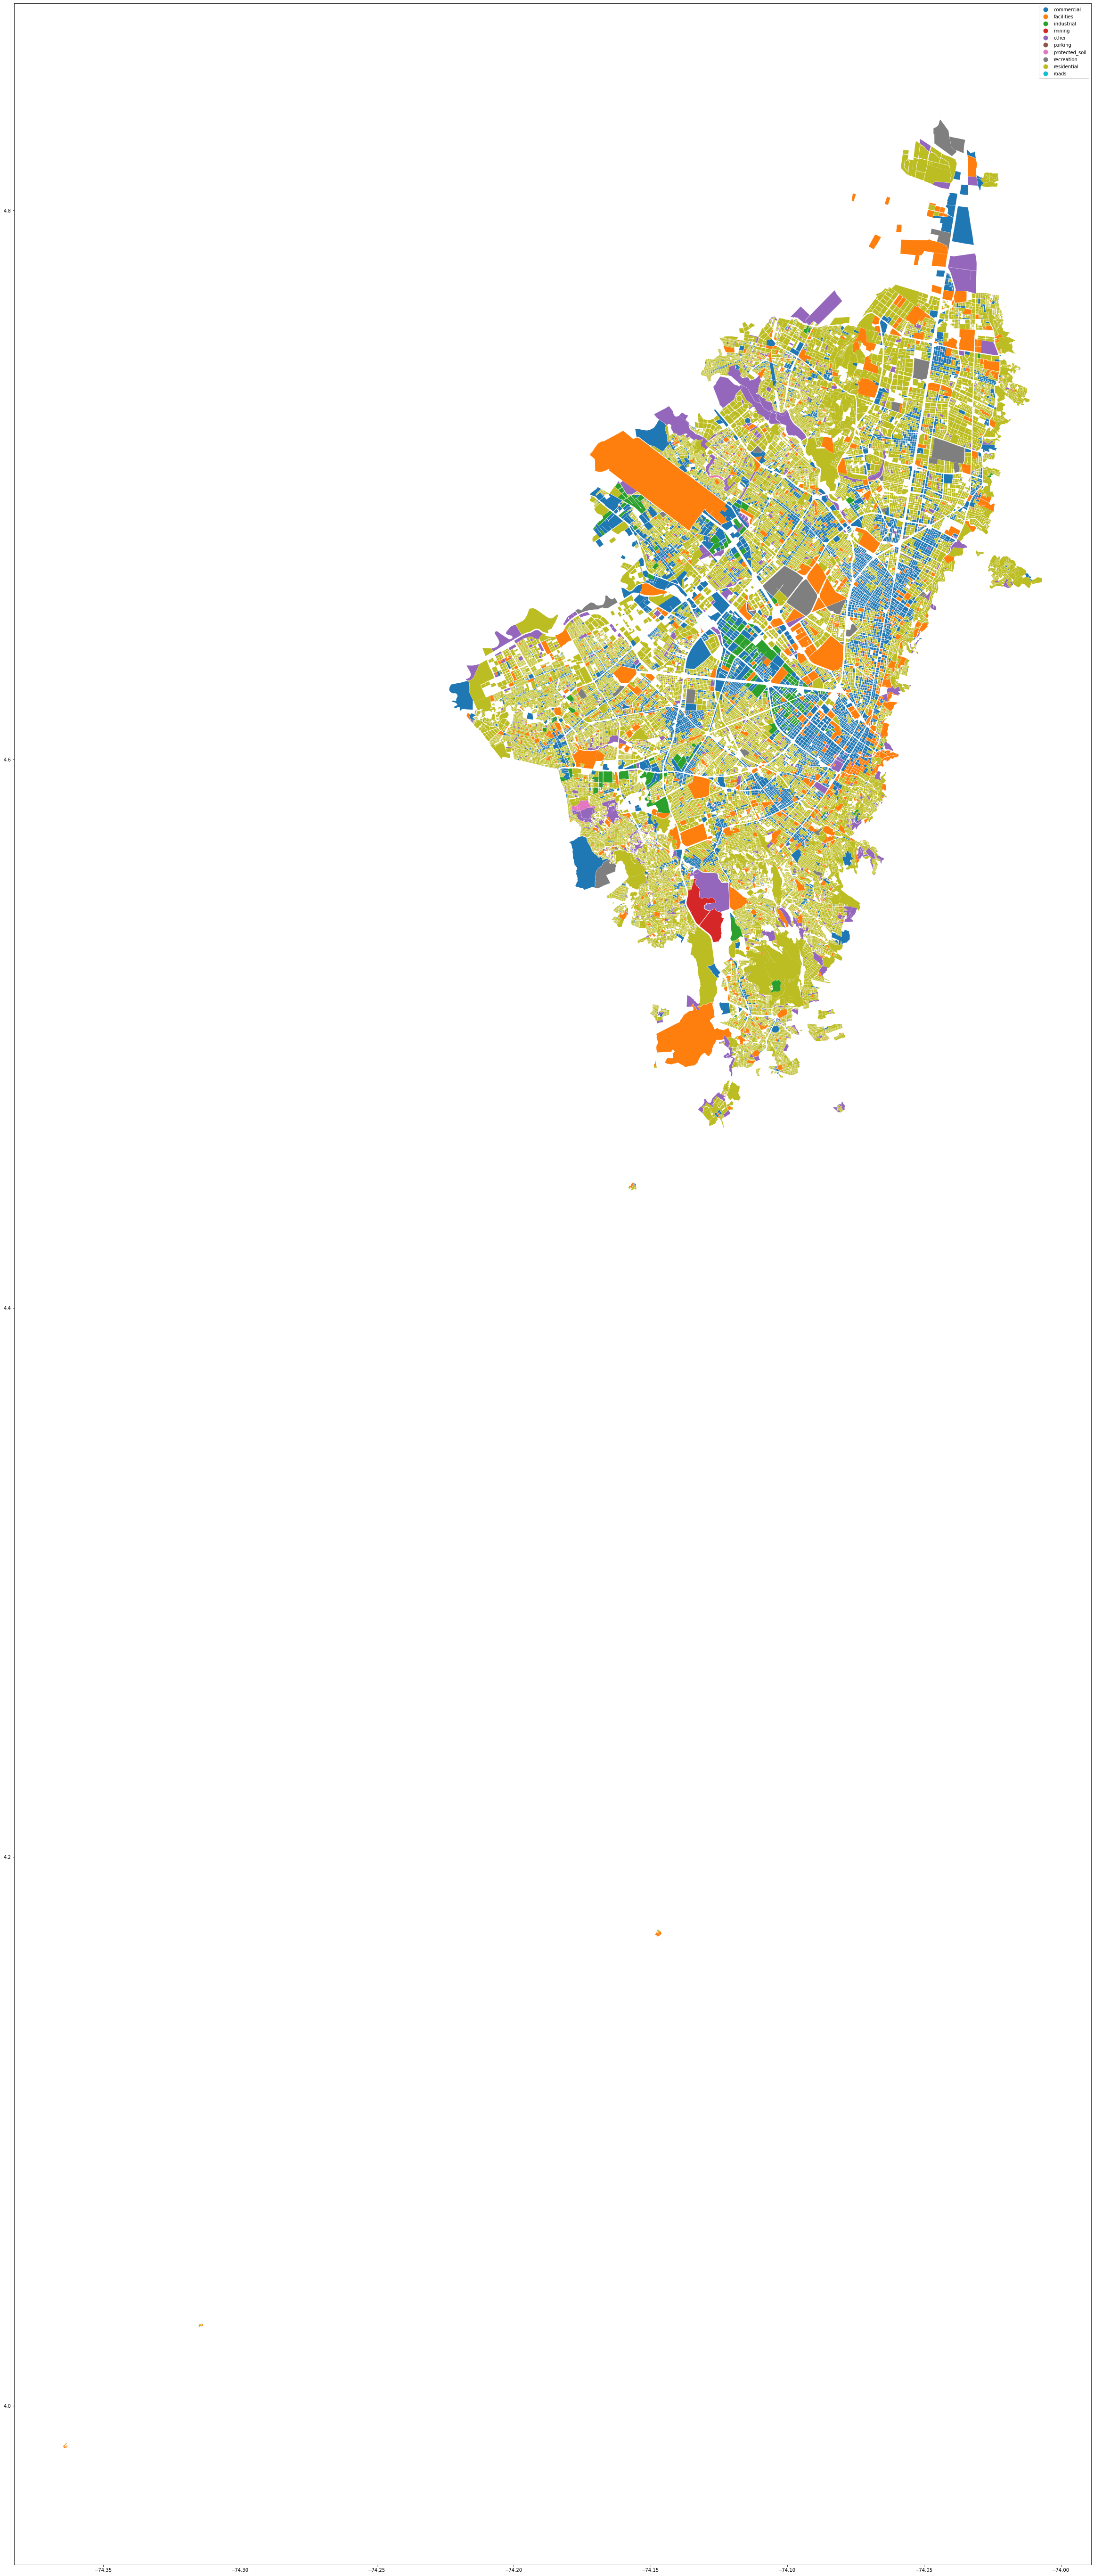

In [13]:
lu_mz_with_geom = lu_mz_with_geom.set_geometry('geometry')
lu_mz_with_geom.crs = "EPSG:4686"


lu_mz_with_geom.plot(column = 'main_lu', figsize=(400,100), legend = True)

In [14]:
lu_mz_with_geom.to_file("../../outputs/02_GOAT_inputs/landuse.shp")